In [1]:


import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import os
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib
from torch import nn


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [92]:
class DataLoader():
    def __init__(self, img_dir, img_dir2, transform = None, target_transform=None):
        self.img_dir = img_dir
        self.img_dir2 = img_dir2
    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        fileNames = os.listdir(self.img_dir)
        label = fileNames[idx].rsplit("t-mask-", 1 )[1]
        img_path = os.path.join(self.img_dir, fileNames[idx])
        img_path2 = os.path.join(self.img_dir2, label)
        image = read_image(img_path)
        image2 = read_image(img_path2)
        return image, image2

In [93]:
dataset = DataLoader("dataset/with_mask", "dataset/without_mask")

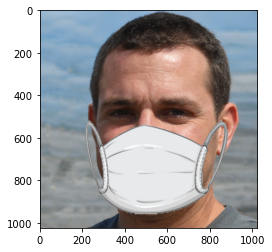

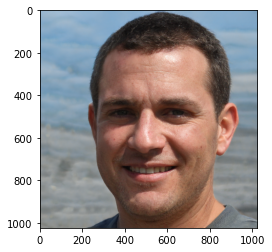

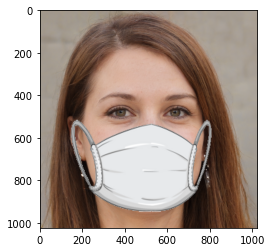

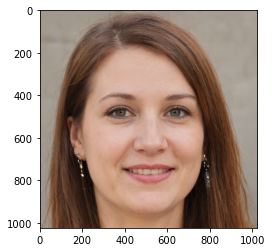

In [96]:
batch_size = 1
trainloader = torch.utils.data.DataLoader(dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True, 
                                          num_workers=0)

# get some images
dataiter = iter(trainloader)
images, images2 = dataiter.next()


for i in range(2): #Run through 2 bathes
    images, images2 = dataiter.next()
    for image, image2 in zip(images,images2): # Run through all samples in a batch
        plt.figure()
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
        plt.show()
        plt.figure()
        plt.imshow(np.transpose(image2.numpy(), (1, 2, 0)))
        plt.show()
